## Importe

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader, Dataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

## MNIST Dataset

In [ ]:
mnist_train = np.loadtxt("/content/sample_data/mnist_train_small.csv", delimiter=",")
mnist_test = np.loadtxt("/content/sample_data/mnist_test.csv", delimiter=",")

In [ ]:
mnist_train_X, mnist_train_y = mnist_train[:, 1:], mnist_train[:, 0]
mnist_test_X, mnist_test_y = mnist_test[:, 1:], mnist_test[:, 0]

# Type float weil single precision für Neuronale Netzwerke bevorzugt ist
mnist_train_X = torch.from_numpy(mnist_train_X).float()
mnist_train_y = torch.from_numpy(mnist_train_y).long()

mnist_test_X = torch.from_numpy(mnist_test_X).float()
mnist_test_y = torch.from_numpy(mnist_test_y).long()

In [ ]:
mnist_trainset = TensorDataset(
    mnist_train_X,
    mnist_train_y
)

mnist_testet = TensorDataset(
    mnist_test_X,
    mnist_test_y
)

mnist_trainloader = DataLoader(mnist_trainset, batch_size=32)
mnist_testloader = DataLoader(mnist_testet, batch_size=1000)

In [ ]:
# Funktion des DataLoaders
for i, batch in enumerate(mnist_trainloader):
    print(i)
    

inputs, labels = batch

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
625 * 32

20000

In [ ]:
labels

tensor([1, 7, 1, 9, 5, 5, 1, 6, 8, 4, 9, 3, 3, 4, 1, 2, 4, 6, 0, 3, 1, 3, 9, 6,
        5, 5, 0, 0, 1, 2, 9, 5])

In [ ]:
x0, y0 = mnist_trainset[0]

In [ ]:
y0

tensor(6)

In [ ]:
mnist_train_X.shape

torch.Size([20000, 784])

In [ ]:
mnist_train_y.shape

torch.Size([20000])

## CIFAR10 Dataset

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Torchvision Datasets können indiziiert werden und implementieren __len__
N = len(trainset)
x0, y0 = trainset[0]

In [ ]:
x0.shape

torch.Size([3, 32, 32])

In [ ]:
y0

6

In [ ]:
# Tensoren können einfach auf die Grafikkarte verschoben werden
x0_cuda = x0.cuda()

# Tensoren enthalten Funktionalität zur Auto-Differenzierung
x0.requires_grad

# Tensoren können problemlos in Numpy-Arrays umgewandelt werden
x0_numpy = x0.numpy()

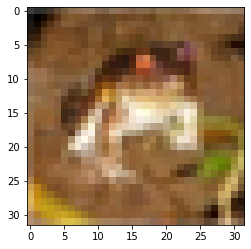

In [ ]:
plt.imshow(np.transpose(x0_numpy, axes=(1, 2, 0)))

In [ ]:
x0_numpy

array([[[0.23137255, 0.16862746, 0.19607843, ..., 0.61960787,
         0.59607846, 0.5803922 ],
        [0.0627451 , 0.        , 0.07058824, ..., 0.48235294,
         0.46666667, 0.47843137],
        [0.09803922, 0.0627451 , 0.19215687, ..., 0.4627451 ,
         0.47058824, 0.42745098],
        ...,
        [0.8156863 , 0.7882353 , 0.7764706 , ..., 0.627451  ,
         0.21960784, 0.20784314],
        [0.7058824 , 0.6784314 , 0.7294118 , ..., 0.72156864,
         0.38039216, 0.3254902 ],
        [0.69411767, 0.65882355, 0.7019608 , ..., 0.84705883,
         0.5921569 , 0.48235294]],

       [[0.24313726, 0.18039216, 0.1882353 , ..., 0.5176471 ,
         0.49019608, 0.4862745 ],
        [0.07843138, 0.        , 0.03137255, ..., 0.34509805,
         0.3254902 , 0.34117648],
        [0.09411765, 0.02745098, 0.10588235, ..., 0.32941177,
         0.32941177, 0.28627452],
        ...,
        [0.6666667 , 0.6       , 0.6313726 , ..., 0.52156866,
         0.12156863, 0.13333334],
        [0.5

## Define Neural Network

### Fully-Connected

In [ ]:
# Option 1
nn.Sequential

# Option 2
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()

        # 1st fully connected layer
        # hier genannt "Linear" (manchmal in anderen Frameworks auch "Dense" oder "FC")
        self.fc1 = nn.Linear(in_features=784, out_features=300)

        # weitere fully connected layer
        self.fc2 = nn.Linear(in_features=300, out_features=100)
        self.fc3 = nn.Linear(in_features=100, out_features=10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

simple_net = SimpleNet()

In [ ]:
# Die Forward-Funktion wird durch direktes Aufrufen des Netzwerks angesprochen:
out = simple_net(mnist_train_X)

In [ ]:
out.shape

torch.Size([20000, 10])

In [ ]:
# Beispiel Fully-Connected Layer (Matrix Multiplikation)
fc_layer = nn.Linear(in_features=784, out_features=300)
print(fc_layer.weight.shape)

out_fc = fc_layer(mnist_train_X)
print(out_fc.shape)

# manuell
out_mm = torch.matmul(mnist_train_X, torch.transpose(fc_layer.weight, 0, 1)) - fc_layer.bias
print(out_mm.shape)

torch.Size([300, 784])
torch.Size([20000, 300])
torch.Size([20000, 300])


In [ ]:
out_fc

tensor([[  27.3190,   69.4843,  -40.0979,  ...,    6.8572,  -96.1254,
           44.6398],
        [  -6.9334,   51.5421,   31.5235,  ...,   28.0583,  -47.1665,
           12.2107],
        [  23.6215,   33.7178,   11.0203,  ...,  -20.5984,   -7.9638,
           -1.4193],
        ...,
        [-137.3582,   31.1245,   12.5914,  ...,   40.9899,  -14.8783,
          100.1037],
        [ -72.2464,   10.5822,  -29.6807,  ...,  -16.6769,    0.7557,
           41.2986],
        [ 103.9067,   40.1895,  -13.0218,  ...,  -30.1469,  -92.2643,
           33.7929]], grad_fn=<AddmmBackward>)

In [ ]:
out_mm

tensor([[  27.2772,   69.4486,  -40.0409,  ...,    6.8321,  -96.1600,
           44.6198],
        [  -6.9752,   51.5064,   31.5805,  ...,   28.0332,  -47.2011,
           12.1907],
        [  23.5796,   33.6821,   11.0774,  ...,  -20.6235,   -7.9985,
           -1.4392],
        ...,
        [-137.4000,   31.0887,   12.6484,  ...,   40.9648,  -14.9129,
          100.0838],
        [ -72.2882,   10.5465,  -29.6237,  ...,  -16.7020,    0.7211,
           41.2787],
        [ 103.8648,   40.1538,  -12.9648,  ...,  -30.1720,  -92.2989,
           33.7729]], grad_fn=<SubBackward0>)

### Convolutional

In [ ]:

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


conv_net = ConvNet()

## Training

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(simple_net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
outputs = simple_net(mnist_train_X)
loss = criterion(outputs, mnist_train_y)

In [ ]:
loss

tensor(13.9658, grad_fn=<NllLossBackward>)

In [ ]:
print(simple_net.fc1.bias.grad)

None


In [ ]:
loss.backward()
print(simple_net.fc1.bias.grad)

tensor([ 4.8172e-03, -2.5183e-03,  1.6562e-03,  1.6482e-03,  1.3238e-03,
         1.6557e-02,  3.6419e-03, -8.9200e-04,  2.1923e-03,  2.4880e-04,
         8.2007e-03, -1.0611e-03,  2.6571e-03,  5.1430e-03,  6.3955e-03,
         8.3258e-03,  3.7117e-04,  1.7698e-03, -1.2819e-03,  9.6285e-05,
        -5.7164e-04,  1.1701e-03,  3.6929e-03, -5.3957e-04,  2.6054e-03,
        -6.1043e-04,  6.2731e-04, -8.9662e-03,  1.2784e-03,  1.3435e-03,
         9.9696e-04, -6.1121e-03,  1.8163e-03,  4.5826e-03,  4.6794e-03,
         4.4532e-03,  1.5830e-03, -4.5234e-03,  2.6762e-03,  4.9832e-03,
        -5.5435e-03, -1.2152e-04, -2.4580e-03, -9.2548e-04, -6.1224e-04,
         3.6230e-03, -4.3957e-04,  7.8693e-03,  1.7731e-03,  3.1135e-03,
        -3.1409e-04,  8.1769e-03, -2.6114e-03,  3.2884e-04,  7.9040e-04,
        -1.0815e-04, -1.9927e-04, -4.0664e-03,  8.9115e-04, -1.9499e-03,
        -2.0740e-03, -4.2787e-03,  5.2430e-03, -2.9243e-03,  3.2386e-03,
        -4.0806e-04, -2.1918e-03,  2.1866e-03,  6.5

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, batch in enumerate(mnist_trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = batch

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize

        # forward - Vorhersae
        outputs = simple_net(inputs)
        # forward - Verlust berechnen
        loss = criterion(outputs, labels)

        # backward
        loss.backward()

        # optimize
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 1.538
[1,   200] loss: 0.487
[1,   300] loss: 0.377
[1,   400] loss: 0.315
[1,   500] loss: 0.299
[1,   600] loss: 0.286
[2,   100] loss: 0.242
[2,   200] loss: 0.206
[2,   300] loss: 0.175
[2,   400] loss: 0.150
[2,   500] loss: 0.157
[2,   600] loss: 0.160
[3,   100] loss: 0.143
[3,   200] loss: 0.129
[3,   300] loss: 0.112
[3,   400] loss: 0.101
[3,   500] loss: 0.108
[3,   600] loss: 0.100
[4,   100] loss: 0.101
[4,   200] loss: 0.101
[4,   300] loss: 0.090
[4,   400] loss: 0.084
[4,   500] loss: 0.090
[4,   600] loss: 0.078
[5,   100] loss: 0.089
[5,   200] loss: 0.096
[5,   300] loss: 0.082
[5,   400] loss: 0.070
[5,   500] loss: 0.083
[5,   600] loss: 0.055
[6,   100] loss: 0.059
[6,   200] loss: 0.056
[6,   300] loss: 0.048
[6,   400] loss: 0.053
[6,   500] loss: 0.060
[6,   600] loss: 0.058
[7,   100] loss: 0.054
[7,   200] loss: 0.048
[7,   300] loss: 0.050
[7,   400] loss: 0.044
[7,   500] loss: 0.087
[7,   600] loss: 0.055
[8,   100] loss: 0.041
[8,   200] 

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for batch in mnist_testloader:
        images, labels = batch
        outputs = simple_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 96 %
